In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt

In [8]:
param = []
for d in filter(lambda x:'Pendulum-run' in x,os.listdir(os.getcwd())):
    if os.path.exists(os.path.join(d,"model_parameters.txt")):
        with open(os.path.join(d,'model_parameters.txt')) as f:
            param.append(json.loads(f.read()))
    

In [28]:
pd.set_option('display.max_columns', None)
data = pd.DataFrame.from_dict(param)
data['name'] = [i.split('/')[-1] for i in data['save_dir']]
data

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_training,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,save_period,epochs_belief_training,name
0,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,10000,0.0050,0.005,64,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run1,NaN,NaN,Pendulum-run1
1,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run13,100.0,NaN,Pendulum-run13
2,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run14,100.0,NaN,Pendulum-run14
3,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run15,100.0,NaN,Pendulum-run15
4,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run16,100.0,NaN,Pendulum-run16
5,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run17,100.0,NaN,Pendulum-run17
6,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run18,100.0,NaN,Pendulum-run18
7,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,1000,0.0500,0.005,32,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run2,NaN,NaN,Pendulum-run2
8,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0100,0.010,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run24,100.0,200.0,Pendulum-run24
9,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,16,2,2,8,False,True,NaN,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run25,100.0,200.0,Pendulum-run25


In [12]:
print('Different columns: \n')
for c in data.columns:
    a = data[c].values
    if not (a[0] == a).all():
        print('\t -  '+c+'\n')

Different columns: 

	 -  seed

	 -  delta

	 -  pretrain_epochs

	 -  size_pred_buf

	 -  batch_size_pred

	 -  enc_lr

	 -  maf_lr

	 -  enc_dim

	 -  enc_l

	 -  enc_training

	 -  hidden_dim

	 -  save_dir

	 -  save_period

	 -  epochs_belief_training



In [29]:
perf = pd.read_csv('perf.csv',sep=';')
data = data.merge(perf,on='name')
data

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_training,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,save_period,epochs_belief_training,name,epochs_trpo,time_to_200,best_perf,unstable,Unlearn
0,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,10000,0.0050,0.005,64,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run1,NaN,NaN,Pendulum-run1,1000,0,400,True,NaN
1,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run13,100.0,NaN,Pendulum-run13,1000,200,200,True,True
2,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run14,100.0,NaN,Pendulum-run14,1000,300,200,True,True
3,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run15,100.0,NaN,Pendulum-run15,1000,0,400,False,True
4,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run16,100.0,NaN,Pendulum-run16,1000,0,500,False,False
5,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run17,100.0,NaN,Pendulum-run17,1000,700,200,False,True
6,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run18,100.0,NaN,Pendulum-run18,1000,0,600,True,True
7,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,1000,0.0500,0.005,32,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run2,NaN,NaN,Pendulum-run2,1000,0,800,True,NaN
8,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0100,0.010,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run24,100.0,200.0,Pendulum-run24,1000,400,200,False,False
9,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,16,2,2,8,False,True,NaN,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run25,100.0,200.0,Pendulum-run25,600,350,200,False,False


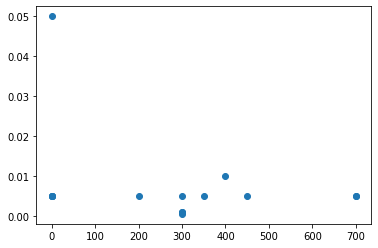

In [33]:
plt.scatter(data['time_to_200'],data['enc_lr'])

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_training,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,save_period,epochs_belief_training,name
0,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,10000,0.0050,0.005,64,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run1,NaN,NaN,Pendulum-run1
1,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run13,100.0,NaN,Pendulum-run13
2,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run14,100.0,NaN,Pendulum-run14
3,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run15,100.0,NaN,Pendulum-run15
4,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run16,100.0,NaN,Pendulum-run16
5,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run17,100.0,NaN,Pendulum-run17
6,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run18,100.0,NaN,Pendulum-run18
7,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,1000,0.0500,0.005,32,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run2,NaN,NaN,Pendulum-run2
8,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0100,0.010,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run24,100.0,200.0,Pendulum-run24
9,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,16,2,2,8,False,True,NaN,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run25,100.0,200.0,Pendulum-run25
